# EDA of dataset

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import warnings
import numpy as np


warnings.filterwarnings("ignore")
df=pd.read_csv("Impact_of_Remote_Work_on_Mental_Health.csv")
print(df.info())
print(df.isnull().sum())
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

Mental_Health_Condition    1196
Physical_Activity          1629
dtype: int64

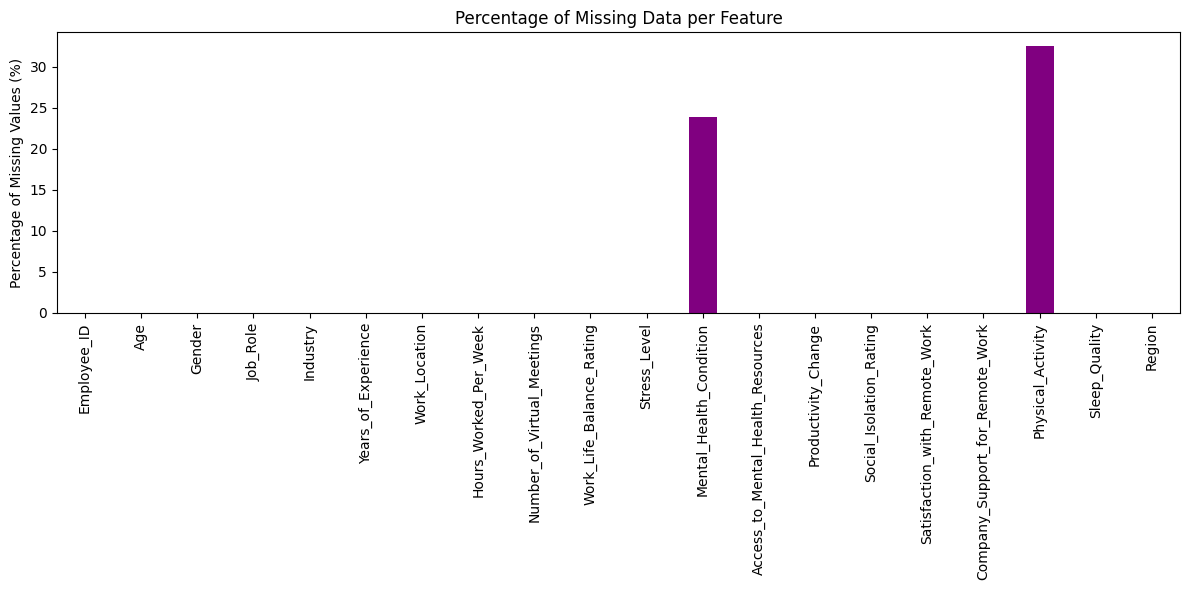

In [2]:
missing_percentage = df.isnull().mean() * 100

plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar', color='purple')
plt.title('Percentage of Missing Data per Feature')
plt.ylabel('Percentage of Missing Values (%)')
plt.xticks(rotation=90, ha='center')  
plt.tight_layout()
plt.show()


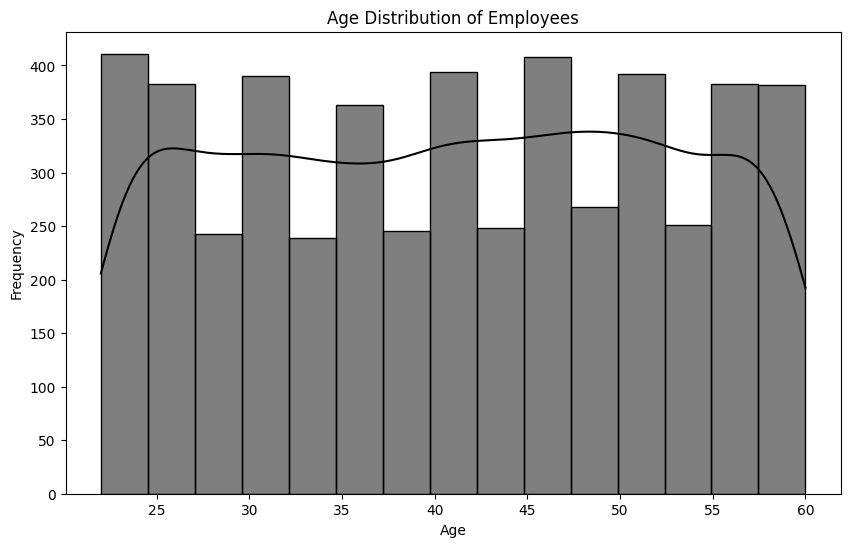

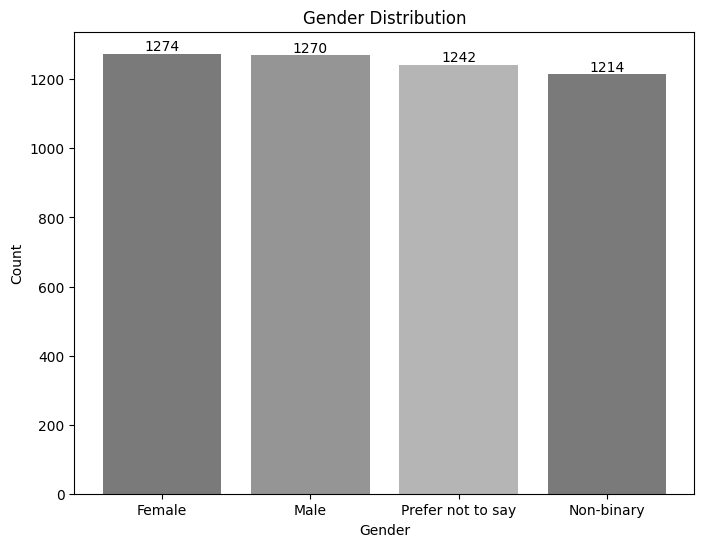

In [3]:
# Plotting the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='black')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

gender_counts = df['Gender'].value_counts()

colors = plt.cm.Greys([0.6, 0.5, 0.4])  

plt.figure(figsize=(8, 6))
bars = plt.bar(gender_counts.index, gender_counts.values, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

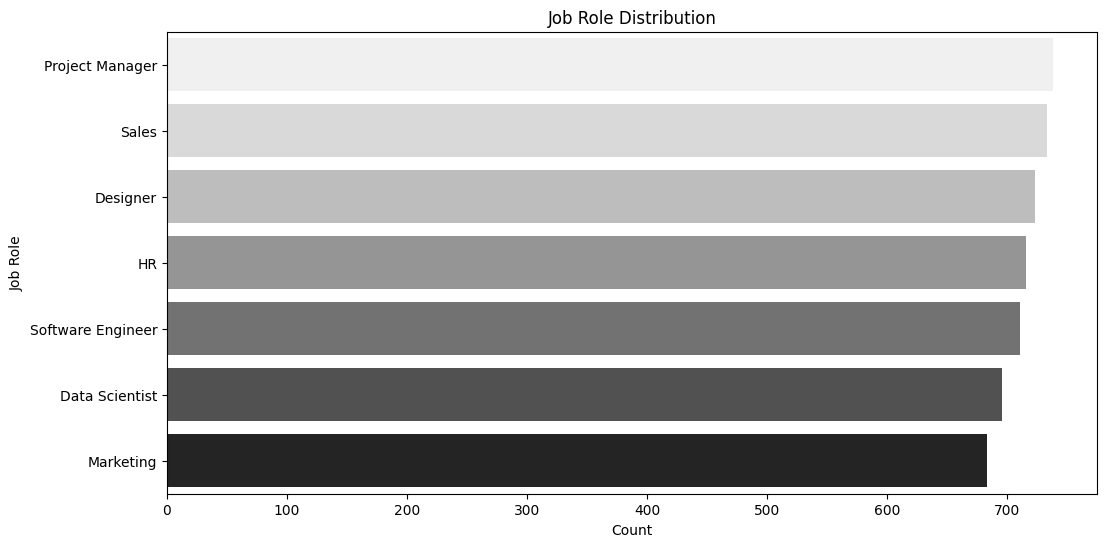

In [4]:
# Job role distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Job_Role', order=df['Job_Role'].value_counts().index, palette='Greys')
plt.title('Job Role Distribution')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.show()

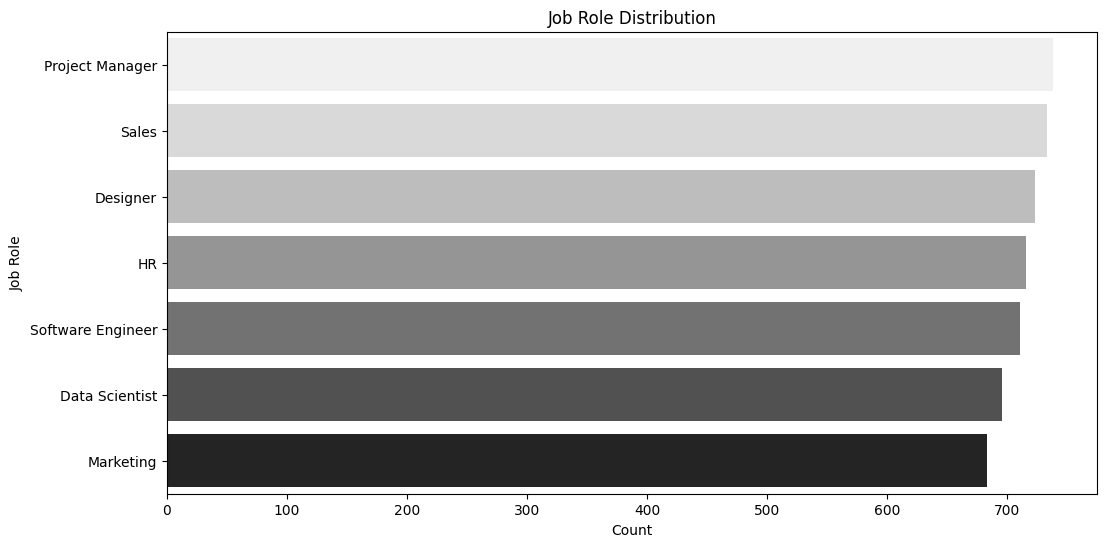

In [5]:
# Job role distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Job_Role', order=df['Job_Role'].value_counts().index, palette='Greys')
plt.title('Job Role Distribution')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.show()

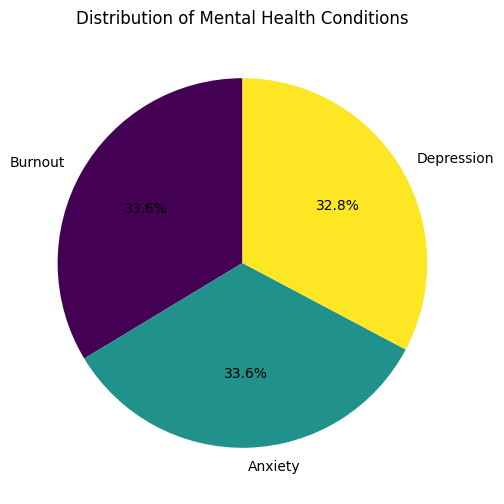

In [6]:
# do a pie chart for Mental_Health_Condition

mental_health_counts = df['Mental_Health_Condition'].value_counts()
plt.figure(figsize=(10, 6))
mental_health_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Distribution of Mental Health Conditions')
plt.ylabel('')
plt.show()

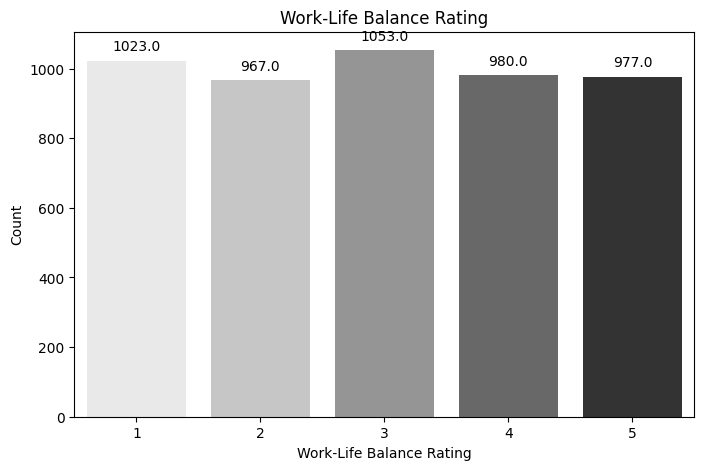

In [7]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Work_Life_Balance_Rating', palette='Greys')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Work-Life Balance Rating')
plt.xlabel('Work-Life Balance Rating')
plt.ylabel('Count')
plt.show()

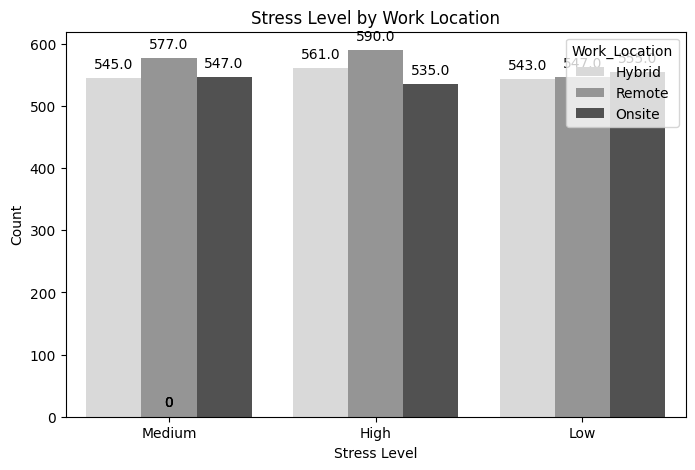

In [8]:
# make a graph with Stress_Level and Work_Location

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Stress_Level', hue='Work_Location', palette='Greys')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('Stress Level by Work Location')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()


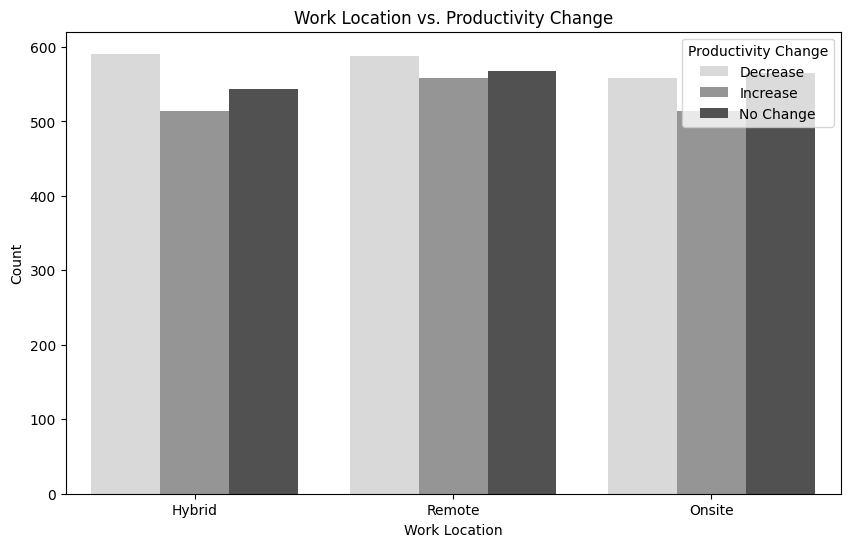

In [9]:
# Bar plot for Work Location vs. Productivity Change
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Work_Location', hue='Productivity_Change', palette='Greys')
plt.title('Work Location vs. Productivity Change')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.legend(title='Productivity Change')
plt.show()

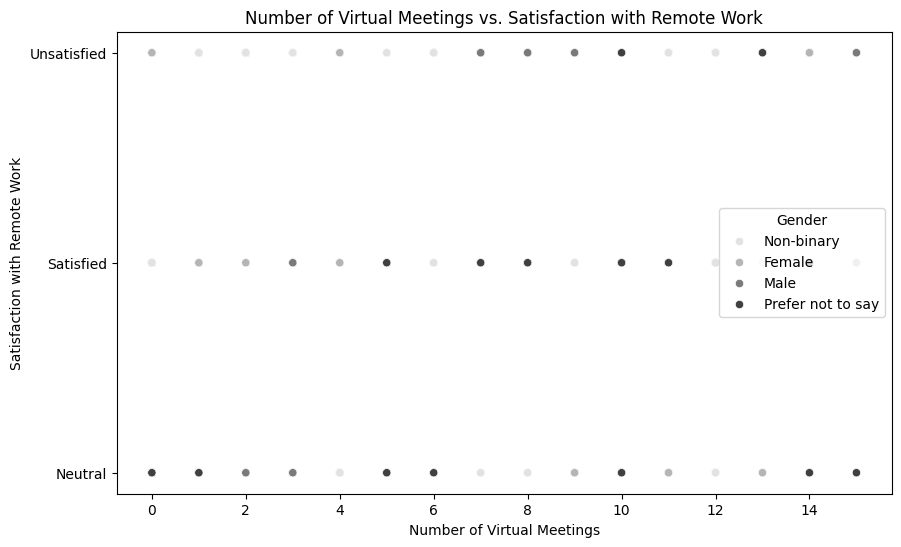

In [10]:
# Scatter plot for Number of Virtual Meetings vs. Satisfaction with Remote Work
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Number_of_Virtual_Meetings', y='Satisfaction_with_Remote_Work', hue='Gender', palette='Greys')
plt.title('Number of Virtual Meetings vs. Satisfaction with Remote Work')
plt.xlabel('Number of Virtual Meetings')
plt.ylabel('Satisfaction with Remote Work')
plt.show()

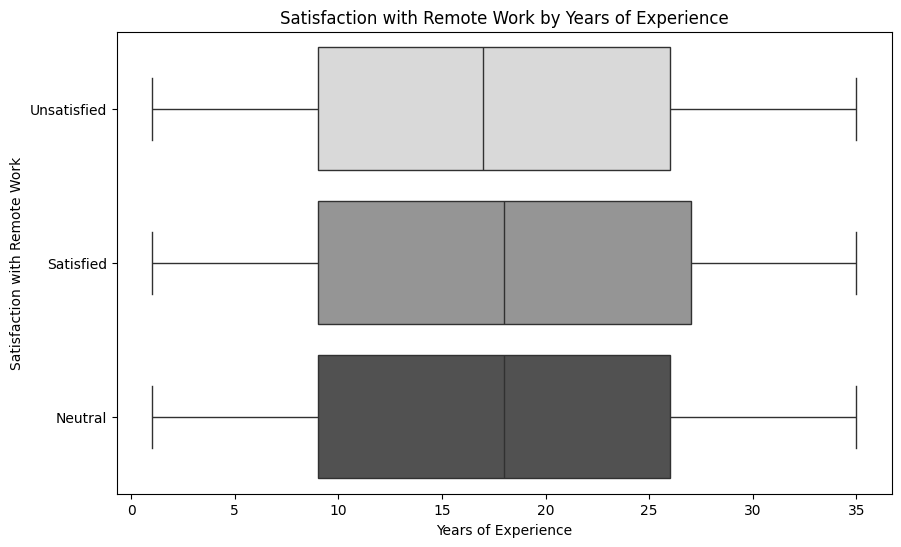

In [11]:
# Boxplot for Years of Experience vs. Satisfaction with Remote Work
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Years_of_Experience', y='Satisfaction_with_Remote_Work', palette='Greys')
plt.title('Satisfaction with Remote Work by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Satisfaction with Remote Work')
plt.show()

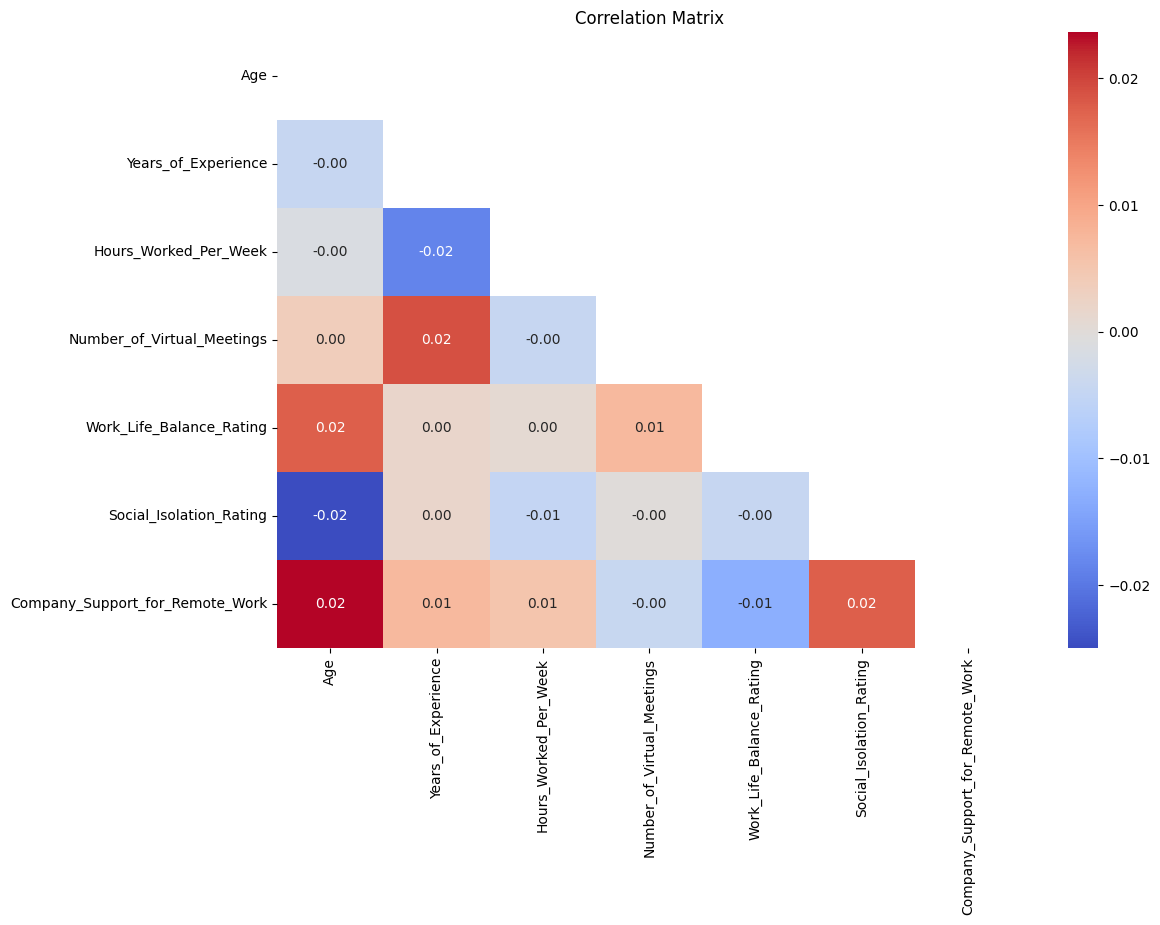

In [12]:
# Correlation matrix heatmap with only numeric columns
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title('Correlation Matrix')
plt.show()